In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats



EDA on Raw dataset




1.   Amazon Dataset




In [7]:
amazon= pd.read_csv("amazon_dataset")

In [8]:
amazon.shape

(342, 3)

In [9]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    342 non-null    object 
 1   price   342 non-null    float64
 2   brand   342 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.1+ KB


In [10]:
amazon.isnull().sum()

date     0
price    0
brand    0
dtype: int64

In [11]:
amazon.isna().sum()

date     0
price    0
brand    0
dtype: int64

In [12]:
amazon.duplicated().sum()

np.int64(0)

In [13]:
amazon.describe(include="all")

,date,price,brand
count,342,342.000000,342
unique,342,NaN,1
top,2025-09-22 10:50:31+00:00,NaN,Amazon
freq,1,NaN,342
mean,NaN,73185.886842,NaN
std,NaN,7958.757669,NaN
min,NaN,46999.000000,NaN
25%,NaN,67711.860000,NaN
50%,NaN,73100.000000,NaN
75%,NaN,79900.000000,NaN


In [14]:
amazon['date'] = pd.to_datetime(amazon['date'], errors='coerce')


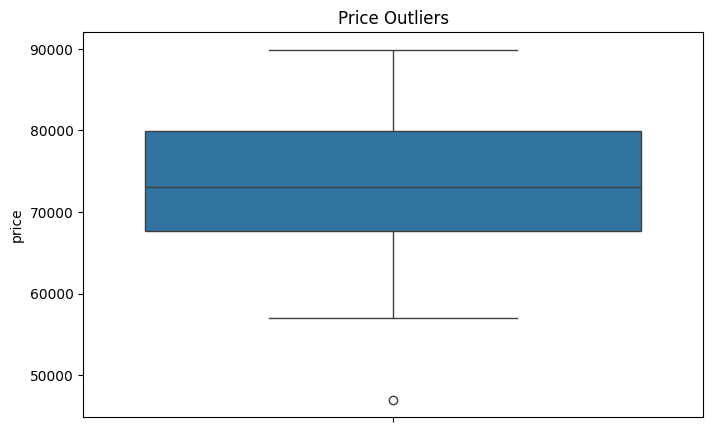


--- PRICE ANOMALIES (>3 STD) ---
       price   z_price
341  46999.0 -3.290323


In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(amazon['price'])
plt.title("Price Outliers")
plt.show()

# Z-score method
amazon['z_price'] = (amazon['price'] - amazon['price'].mean()) / amazon['price'].std()
anomalies = amazon[amazon['z_price'].abs() > 3]

print("\n--- PRICE ANOMALIES (>3 STD) ---")
print(anomalies[['price','z_price']].head(20))

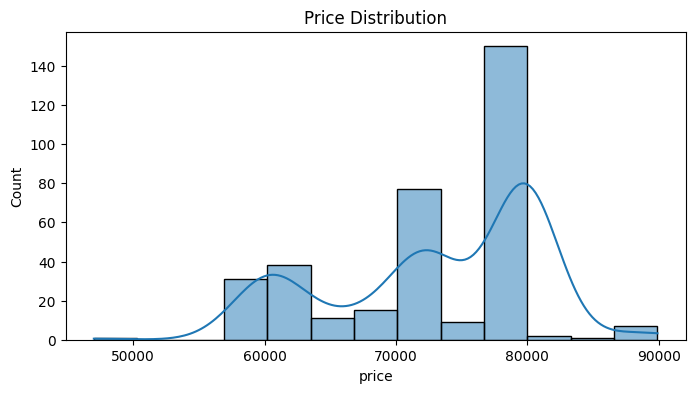

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(amazon['price'], kde=True)
plt.title("Price Distribution")
plt.show()



2.   Flipkart Dataset



In [17]:
flipkart= pd.read_csv("flipkart_dataset.csv")

In [18]:
flipkart.shape

(728, 2)

In [19]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   728 non-null    int64 
 1   Date    728 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


In [20]:
flipkart.describe(include="all")

,Price,Date
count,728.000000,728
unique,NaN,728
top,NaN,2025-11-22
freq,NaN,1
mean,65676.795330,NaN
std,5638.450855,NaN
min,51999.000000,NaN
25%,59999.000000,NaN
50%,64900.000000,NaN
75%,69999.000000,NaN


In [21]:
flipkart.duplicated().sum()

np.int64(0)

In [22]:
flipkart.isnull().sum()

Price    0
Date     0
dtype: int64

In [23]:
flipkart.isna().sum()

Price    0
Date     0
dtype: int64

In [24]:
flipkart['Date'] = pd.to_datetime(flipkart['Date'], errors='coerce')


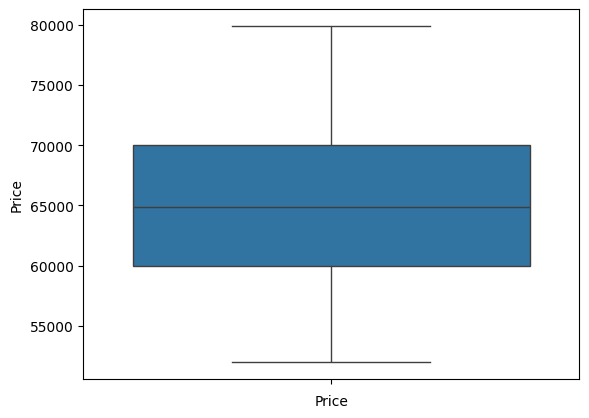

In [25]:
#Outlier Visualization

sns.boxplot(flipkart["Price"])
plt.xlabel("Price")
plt.show()



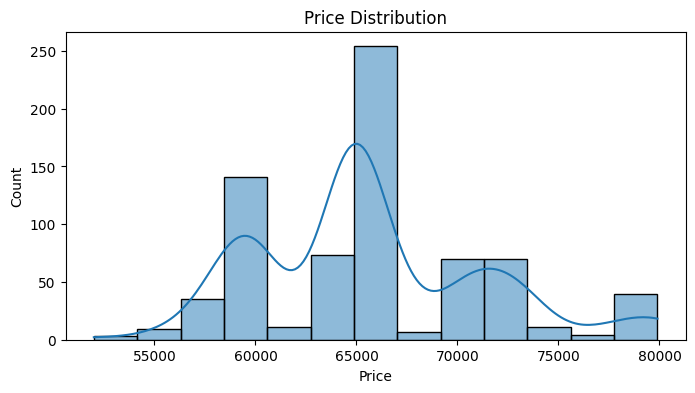

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(flipkart['Price'], kde=True)
plt.title("Price Distribution")
plt.show()


Comaprison

C:\Users\deepa\AppData\Local\Temp\ipykernel_12524\1240200290.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(amazon['price'], label="amazon Price", shade=True)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12524\1240200290.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(flipkart['Price'], label="flipkart Price", shade=True)


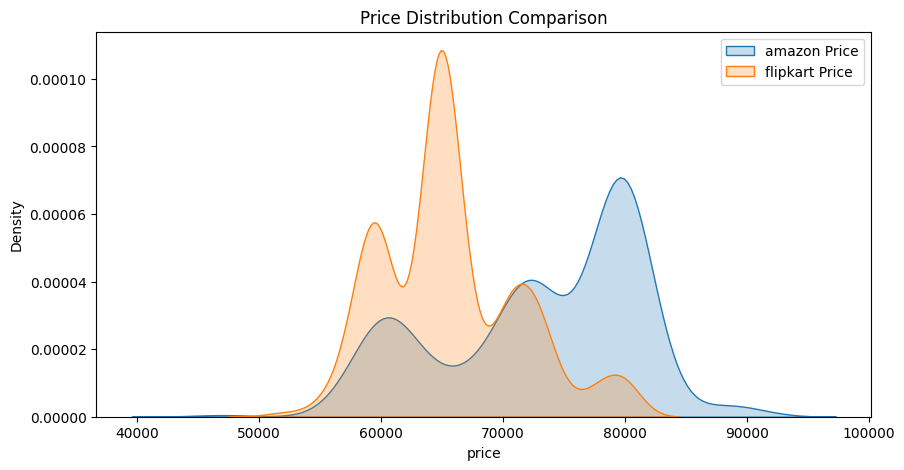

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.kdeplot(amazon['price'], label="amazon Price", shade=True)
sns.kdeplot(flipkart['Price'], label="flipkart Price", shade=True)
plt.legend()
plt.title("Price Distribution Comparison")
plt.show()


In [28]:
flipkart= flipkart.rename(
    columns =
    {'Date': 'date',
    'Price': 'price'})

In [29]:
flipkart['date'] = pd.to_datetime(flipkart['date'], errors='coerce')
amazon['date'] = pd.to_datetime(amazon['date'], errors='coerce')

In [30]:
compare_price = pd.DataFrame({
    "Amazon Price": amazon["price"],
    "Flipkart Price": flipkart["price"]
})


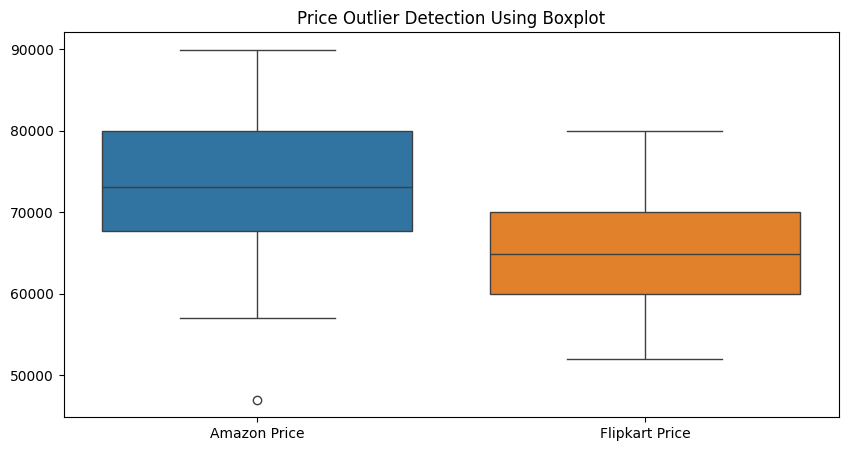

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(compare_price[["Amazon Price", "Flipkart Price"]])
plt.title("Price Outlier Detection Using Boxplot")
plt.show()
